#import Packages

In [12]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.decomposition import PCA

#SKlearn (Dataset loading utilities)

The `sklearn.datasets` package includes:


*   some small toy datasets
*   larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the ‘real world’.

To evaluate the impact of the scale of the dataset (`n_samples` and `n_features`) while controlling the statistical properties of the data (typically the correlation and informativeness of the features), it is also possible to generate synthetic data.



##General dataset API
There are three main kinds of dataset interfaces that can be used to get datasets depending on the desired type of dataset.

*   The dataset **loaders**: to load small standard datasets
*   The dataset **fetchers**: to download and load larger datasets
*   The dataset **generation functions**: to generate controlled synthetic datasets



**Tip**: These functions return a tuple (X, y) consisting of a n_samples * n_features numpy array X and an array of length n_samples containing the targets y.



### Loaders (Toy datasets)
- Boston house prices dataset
- Iris plants dataset
- Diabetes dataset
- Optical recognition of handwritten digits dataset
- Linnerrud dataset (twenty middle-aged men in a fitness club)
- Wine recognition dataset
- Breast cancer wisconsin (diagnostic) dataset

## Fetchers (Real world datasets)
- The Olivetti faces dataset
- The 20 newsgroups text dataset
- The Labeled Faces in the Wild face recognition dataset
- Forest covertypes
- RCV1 dataset
- Kddcup 99 dataset
- California Housing dataset

## Generated datasets
- Generators for classification and clustering
- Generators for regression
- Generators for manifold learning
- Generators for decomposition

#MNIST Dataset (Using Fetchers)
The MNIST dataset is a large database of handwritten digits.

*   MNSIT dataset is publicly available.
*   The data requires little to no processing before using.
*   It is a voluminous dataset.


MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

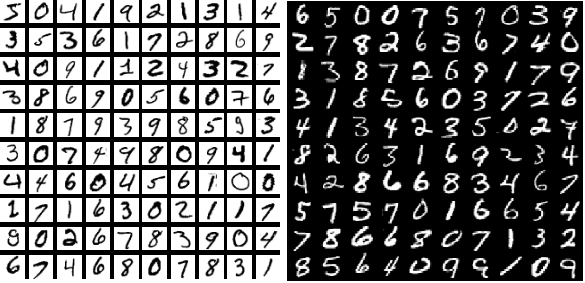

In [13]:
img = cv2.imread('MNIST.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

##Loading the MNIST Dataset

The sklearn.datasets package is able to directly download data sets from the repository 

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [15]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [16]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

##Plotting a single MNIST digit using Matplotlib

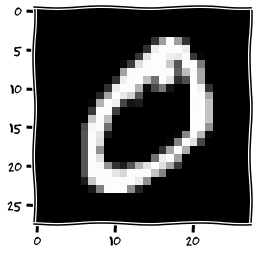

In [17]:
# pick a sample to plot
sample = 1
image = X[sample].reshape(28, 28)   # plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

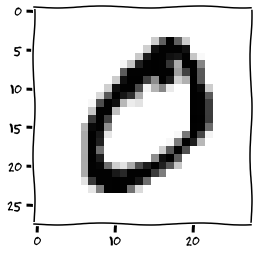

In [18]:
# white background and black digit (reverse)
plt.imshow(image, cmap='gray_r')
plt.show()

##Plotting multiple MNIST digits using Matplotlib

In [19]:
num = 20
images = X[:num]
labels = y[:num]

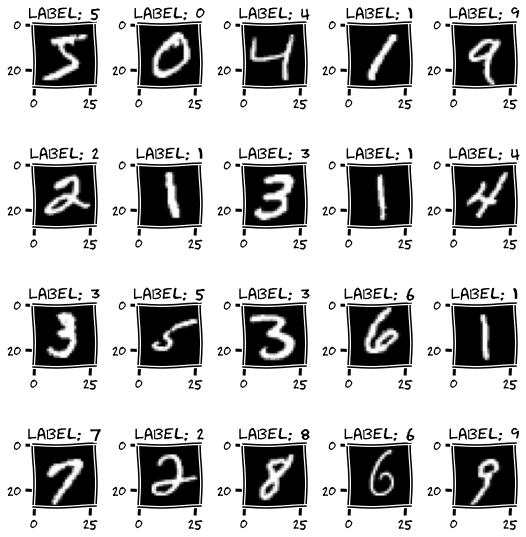

In [20]:
# using subplot
num_row = 4
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#Iris Dataset (Using Loaders)

The iris dataset is a classic and very easy multi-class classification dataset.


This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

|||
|-----------|-----------|
|Classes | 3|
|Samples per class | 50|
|Samples total | 150|
|Dimensionality | 4|
|Features | real, positive|

In [21]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

([], <a list of 0 Text major ticklabel objects>)

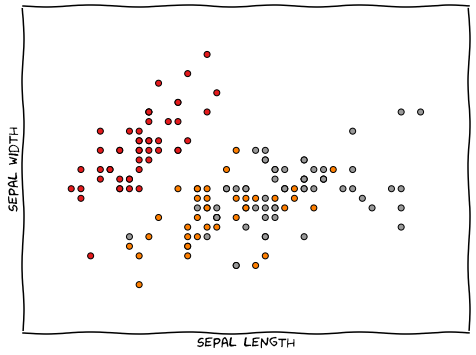

In [22]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


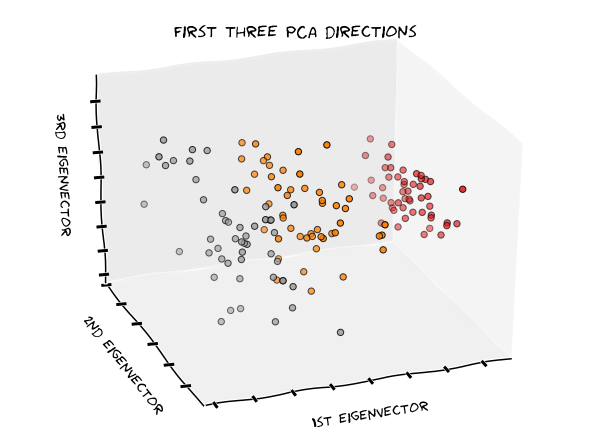

In [23]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#Generated Dataset 

Scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.

##Generators for regression

[make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) produces regression targets as an optionally-sparse random linear combination of random features, with noise. Its informative features may be uncorrelated, or low rank (few features account for most of the variance).



Fit **Ridge** and **HuberRegressor** on a dataset with outliers.

In [24]:
#Generate a random regression problem
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0)

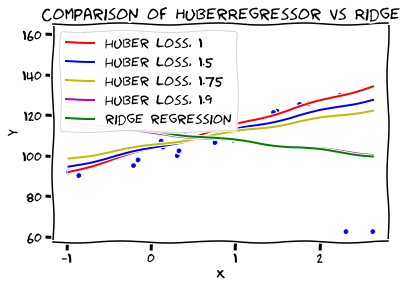

In [25]:
# Add four strong outliers to the dataset.


rng = np.random.RandomState(seed=42)  #pseudo-random number generator

X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))  #Stack arrays in sequence vertically (row wise)
y = np.concatenate((y, y_outliers))  #Join a sequence of arrays along an existing axis
plt.plot(X, y, "b.")


# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]
x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)



# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")
plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

The example shows that the predictions in ridge are strongly influenced by the outliers present in the dataset. The Huber regressor is less influenced by the outliers since the model uses the linear loss for these. As the parameter epsilon is increased for the Huber regressor, the decision function approaches that of the ridge.



##Generators for classification and clustering (discrete targets)

###Single label
Both [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) and [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) create multiclass datasets by allocating each class one or more normally-distributed clusters of points. make_blobs provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering.

In [26]:
# make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)

In [27]:
print(X.shape)

(10, 2)


In [28]:
y

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

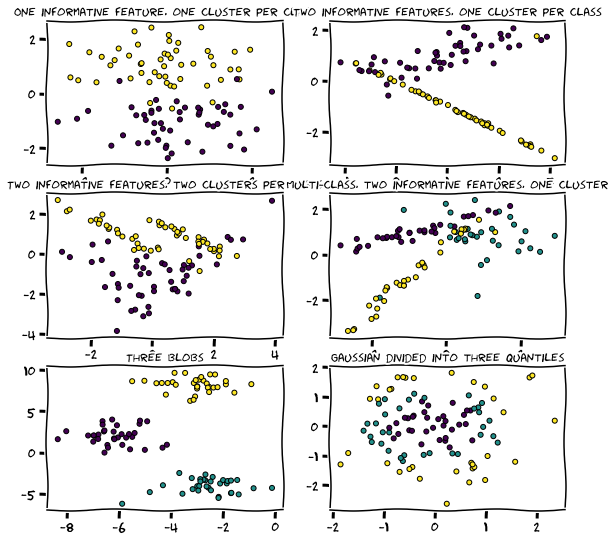

In [29]:

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize="small")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.show()

###Multilabel
make_multilabel_classification generates random samples with multiple labels, reflecting a bag of words drawn from a mixture of topics. The number of topics for each document is drawn from a Poisson distribution, and the topics themselves are drawn from a fixed random distribution. Similarly, the number of words is drawn from Poisson, with words drawn from a multinomial, where each topic defines a probability distribution over words. Simplifications with respect to true bag-of-words mixtures include:

Per-topic word distributions are independently drawn, where in reality all would be affected by a sparse base distribution, and would be correlated.

For a document generated from multiple topics, all topics are weighted equally in generating its bag of words.

Documents without labels words at random, rather than from a base distribution.